In [50]:
import json
import pandas as pd
import numpy as np

countries = ["United States", "India", "Pakistan", "Nigeria", "Philippines", "United Kingdom", "Germany", "Uganda", "Canada", "Egypt", "France", "Australia"]

topics = [
    "Politics",
    "Social Networks",
    "Social Inequality",
    "Family & Changing Gender Roles",
    "Work Orientation",
    "Religion",
    "Environment",
    "National Identity",
    "Citizenship",
    "Leisure Time and Sports",
    "Health and Health Care"
]


vis_countries = ["US", "India", "Pakistan", "Nigeria", "Philippines", "UK", "Germany", "Uganda", "Canada", "Egypt", "France", "Australia"]

vis_topics = [
    "Politics",
    "SocialNet",
    "Inequality",
    "Family",
    "Work",
    "Religion",
    "Environment",
    "Identity",
    "Citizenship",
    "Leisure",
    "Health"
]


schwartz_values = {
    "Power": ["Social Power", "Authority", "Wealth", "Preserving my Public Image", "Social Recognition"],
    "Achievement": ["Successful", "Capable", "Ambitious", "Influential", "Intelligent", "Self-Respect"],
    "Hedonism": ["Pleasure", "Enjoying Life"],
    "Stimulation": ["Daring", "A Varied Life", "An Exciting Life"],
    "Self-direction": ["Creativity", "Curious", "Freedom", "Choosing Own Goals", "Independent"],
    "Universalism": ["Protecting the Environment", "A World of Beauty", "Broad-Minded", "Social Justice", "Wisdom", "Equality", "A World at Peace", "Inner Harmony", "Unity With Nature"],
    "Benevolence": ["Helpful", "Honest", "Forgiving", "Loyal", "Responsible", "True Friendship", "A Spiritual Life", "Mature Love", "Meaning in Life"],
    "Tradition": ["Devout", "Accepting my Portion in Life", "Humble", "Moderate", "Respect for Tradition", "Detachment"],
    "Conformity": ["Politeness", "Honoring of Parents and Elders", "Obedient", "Self-Discipline"],
    "Security": ["Clean", "National Security", "Social Order", "Family Security", "Reciprocation of Favors", "Healthy", "Sense of Belonging"]
}

def get_scenario_list(countries, topics):
    scenarios_list = []
    for country in countries:
        for topic in topics:
            scenarios_list.append(f"{country}+{topic}")
    return scenarios_list
scenarios_list = get_scenario_list(countries, topics)
print(len(scenarios_list))

def get_value_list(schwartz_values):
    value_list = []
    for key, value in schwartz_values.items():
        value_list.extend([f"{value}" for value in value])
    return value_list
value_list = get_value_list(schwartz_values)
print(len(value_list))

132
56


### Load Data

In [51]:
t1_measures = pd.read_csv("../../outputs/evaluation/Llama-3.3-70B-Instruct_t1.csv")
print(len(t1_measures))
t2_measures = pd.read_csv("../../outputs/evaluation/Llama-3.3-70B-Instruct_t2.csv")
print(len(t2_measures))

1056
14658


## Task1 Measure

In [52]:
def clean_generation(response):
    if "```" in response:
        # print("response", response)
        sub1 = "```json"
        sub2 = "```"
        response = ''.join(response.split(sub1)[1].split(sub2)[0])
        # print("after response", response)
        return response
    else:
        return response
        
def clean_value_response(response):
    """1: very much like me, 2: like me, 3: not like me, 4: Not like me at all """
    response = response.lower().replace("not like me at all", "4").replace("not like me", "3").replace("very much like me", "1").replace("like me", "2")
    return response


def generate_full_t1_table(t1_measures: pd.DataFrame, value_list: list):
    full_t1_table_pd = []
    for index, row in t1_measures.iterrows():
        country = row['country']
        topic   = row['topic']
        prompt_index = row['prompt_index']
        try:
            response = json.loads(clean_generation(row['response']))
        except:
            # print("index", index)
            # print("row['response']", clean_generation(row['response']))
            continue

        value_response_list = []
        for value in value_list:
            try:
                if value in response.keys():
                    value_response_list.append(int(clean_value_response(response[value])[0]))
            except:
                print("except:", response)

        # value_response_list = [int(response[value]) if len(response[value]) == 0 else int(response[value].split(":")[0]) for value in value_list]
        pd_row = [country, topic, prompt_index] + value_response_list
        full_t1_table_pd.append(pd_row)
        # print("response", row)
    return full_t1_table_pd


full_t1_responses = pd.DataFrame(generate_full_t1_table(t1_measures, value_list), columns=['country', 'topic', 'prompt_index'] + [f"value_{value}" for value in value_list])
full_t1_responses

,country,topic,prompt_index,value_Social Power,value_Authority,value_Wealth,value_Preserving my Public Image,value_Social Recognition,value_Successful,value_Capable,...,value_Honoring of Parents and Elders,value_Obedient,value_Self-Discipline,value_Clean,value_National Security,value_Social Order,value_Family Security,value_Reciprocation of Favors,value_Healthy,value_Sense of Belonging
0,United States,Politics,3,3,2,2,3,2,2,2,...,2,2,2,2,1,2,1,2,1,2
1,United States,Politics,7,3,3,3,3,3,2,2,...,2,3,2,2,1,2,1,3,1,2
2,United States,Social Networks,0,4,3,3,3,3,2,1,...,2,3,2,2,1,2,1,2,1,2
3,United States,Social Networks,1,4,3,3,3,2,2,2,...,2,2,2,2,1,2,1,2,1,2
4,United States,Social Networks,2,3,3,3,3,2,2,1,...,2,3,2,2,2,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Australia,Citizenship,4,4,3,3,3,2,2,1,...,2,2,2,2,2,2,1,2,1,1
425,Australia,Leisure Time and Sports,1,4,4,3,3,3,2,2,...,3,4,2,2,3,3,2,3,1,2
426,Australia,Leisure Time and Sports,3,4,4,3,4,3,2,2,...,3,3,2,2,3,3,2,2,1,1
427,Australia,Health and Health Care,0,4,3,3,2,2,2,1,...,2,2,2,2,2,2,1,2,1,1


In [53]:
def get_matrix(full_responses: pd.DataFrame, scenarios_list: list, value_list: list):
    full_matrix = []
    full_pd = []
    for scenario in scenarios_list:
        country, topic = scenario.split('+')
        average_prompting = full_responses[(full_responses['country'] == country) & (full_responses['topic'] == topic )].iloc[:,3:].mean()
        full_matrix.append(list(average_prompting))
        full_pd.append([country, topic] + list(average_prompting))
    full_pd_all = pd.DataFrame(full_pd, columns=['country', 'topic'] + [f"value_{value}" for value in value_list])
    return np.array(full_matrix), full_pd_all

In [54]:
def min_max_normalization(matrix):
    min = np.min(matrix)
    max = np.max(matrix)
    print("matrix", matrix)
    new_matrix = (t1_matrix - min) / (max - min)
    print("new_matrix", new_matrix)
    return new_matrix

In [55]:
t1_matrix, t1_pd = get_matrix(full_t1_responses, scenarios_list, value_list)
t1_matrix
# full_t1_matrix = pd.DataFrame(t1_matrix, columns=['country', 'topic'] + [f"value_{value}" for value in value_list])
# full_t1_matrix

array([[3.        , 2.5       , 2.5       , ..., 2.5       , 1.        ,
        2.        ],
       [3.5       , 3.        , 3.        , ..., 2.        , 1.        ,
        1.75      ],
       [3.5       , 3.        , 3.        , ..., 2.        , 1.        ,
        1.5       ],
       ...,
       [4.        , 3.        , 3.        , ..., 2.        , 1.        ,
        1.33333333],
       [4.        , 4.        , 3.        , ..., 2.5       , 1.        ,
        1.5       ],
       [4.        , 3.5       , 3.5       , ..., 2.        , 1.        ,
        1.        ]])

In [56]:
t1_matrix = min_max_normalization(t1_matrix)

matrix [[3.         2.5        2.5        ... 2.5        1.         2.        ]
 [3.5        3.         3.         ... 2.         1.         1.75      ]
 [3.5        3.         3.         ... 2.         1.         1.5       ]
 ...
 [4.         3.         3.         ... 2.         1.         1.33333333]
 [4.         4.         3.         ... 2.5        1.         1.5       ]
 [4.         3.5        3.5        ... 2.         1.         1.        ]]
new_matrix [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


## Task2 Measure

In [57]:
def generate_full_t2_table(t2_measures: pd.DataFrame, value_list: list) -> pd.DataFrame:
    ### Get the full dictionary
    full_value_dict = {}
    for index, row in t2_measures.iterrows():
        if row['model_choice'] == True:
            country = row['country']
            topic   = row['topic']
            prompt_index = row['prompt_index']
            key = f"{country}+{topic}+{prompt_index}"
            value = row['value']
            # polarity = 4 if row['polarity'] == 'positive' else 1
            polarity = 1 if row['polarity'] == 'positive' else 0
            if key in full_value_dict.keys():
                # full_value_dict[key].setdefault(value, []).append(polarity)
                full_value_dict[key][value] = polarity
            else:
                full_value_dict[key] = {value: polarity}

    ### Get the full dictionary
    full_t2_table_pd = []
    for key, value_dict in full_value_dict.items():
        country, topic, prompt_index = key.split('+')
        value_response_list = [int(value_dict[value]) if value in value_dict.keys() else 0 for value in value_list]
        pd_row = [country, topic, prompt_index] + value_response_list
        full_t2_table_pd.append(pd_row)
    return full_t2_table_pd


In [58]:
full_t2_responses = pd.DataFrame(generate_full_t2_table(t2_measures, value_list), columns=['country', 'topic', 'prompt_index'] + [f"value_{value}" for value in value_list])
full_t2_responses

,country,topic,prompt_index,value_Social Power,value_Authority,value_Wealth,value_Preserving my Public Image,value_Social Recognition,value_Successful,value_Capable,...,value_Honoring of Parents and Elders,value_Obedient,value_Self-Discipline,value_Clean,value_National Security,value_Social Order,value_Family Security,value_Reciprocation of Favors,value_Healthy,value_Sense of Belonging
0,United States,Politics,5,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
1,United States,Social Networks,5,0,0,1,1,1,0,1,...,1,0,1,1,1,1,1,1,1,1
2,United States,Social Inequality,5,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,United States,Family & Changing Gender Roles,5,0,0,0,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
4,United States,Work Orientation,5,1,0,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Australia,Environment,5,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
128,Australia,National Identity,5,0,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
129,Australia,Citizenship,5,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
130,Australia,Leisure Time and Sports,5,0,0,0,0,1,0,1,...,1,0,1,1,1,1,1,1,1,1


In [59]:
t2_matrix, t2_pd  = get_matrix(full_t2_responses, scenarios_list, value_list)
t2_matrix

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

## Alignment Measures

In [60]:
import numpy as np
from scipy.spatial.distance import cdist


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


class AlignmentMeasures:
    def __init__(self, value_list: list, scenarios_list: list):
        self.value_list = value_list
        self.scenarios_list = scenarios_list

    def euclidean_distance(self, t1_matrix, t2_matrix):
        # return cdist(self.t1_matrix, self.t2_matrix, 'euclidean')
        diff = t1_matrix - t2_matrix
        return np.einsum('ij,ij->ij', diff, diff)

    def euclidean_distanc_sum(self, t1_matrix, t2_matrix):
        return cdist(t1_matrix, t2_matrix, 'euclidean')
        # diff = t1_matrix - t2_matrix
        # return np.einsum('ij,ij->ij', diff, diff)

    def value_priority_ranking(self, difference_matrix):
        sorted_rows = np.sort(difference_matrix, axis=1)
        sorted_rows_idx = np.argsort(difference_matrix, axis=1)
        sorted_value = np.array([[self.value_list[idx] for idx in row] for row in sorted_rows_idx])
        return sorted_rows, sorted_rows_idx, sorted_value


    def scenario_ranking(self, difference_matrix):
        sorted_columns = np.sort(difference_matrix, axis=0)
        sorted_columns_idx = np.argsort(difference_matrix, axis=0)
        sorted_value = np.array([[self.scenarios_list[idx] for idx in row] for row in sorted_columns_idx])
        return sorted_columns, sorted_columns_idx, sorted_value

    # def manhattan_distance(self):
    #     # return cdist(self.t1_matrix, self.t2_matrix, 'cityblock')
    #     return np.abs(self.t1_matrix - self.t2_matrix)


In [61]:
align_measures = AlignmentMeasures(value_list, scenarios_list)
d_euclidean = align_measures.euclidean_distance(t1_matrix, t2_matrix)
rank_value_priority, rank_idx_value_priority, rank_value_list_priority = align_measures.value_priority_ranking(d_euclidean)
rank_scenario, rank_idx_scenario, rank_value_list_scenario = align_measures.scenario_ranking(d_euclidean)

In [62]:
# t1_matrix = _binarize_matrix(self.t1_matrix).flatten()
# t2_matrix = t2_matrix.flatten()

## Result Analysis

### Group Countries

In [63]:

# def min_max_normalization(matrix: np.array):
#     min = np.min(matrix)
#     max = np.max(matrix)
#     new_matrix = (matrix - min) / (max - min)
#     return new_matrix


# def binarize_matrix(matrix: np.array) -> np.array:
#     new_matrix = min_max_normalization(matrix)
#     return np.where(new_matrix < 0.5, 0., 1.)



def min_max_normalization(matrix: np.array, min=None, max=None):
    if not min:
        min = np.min(matrix)
    if not max:
        max = np.max(matrix)
    # print(f"min={min}, max={max}")
    new_matrix = (matrix - min) / (max - min)
    return new_matrix


def binarize_matrix(matrix: np.array, min=None, max=None) -> np.array:
    # print("old matrix", matrix)
    new_matrix = min_max_normalization(matrix, min, max)
    binarized = np.where(new_matrix < 0.5, 0., 1.)
    # print("binarized matrix", binarized)
    return binarized




def alignment_rate(t1_matrix, t2_matrix):
    # t1_matrix = binarize_matrix(t1_matrix).flatten()
    # t2_matrix = binarize_matrix(t2_matrix).flatten()
    t1_matrix = t1_matrix.flatten()
    t2_matrix = t2_matrix.flatten()
    # Create the confusion matrix
    cm = confusion_matrix(t1_matrix, t2_matrix)
    accuracy = accuracy_score(t1_matrix, t2_matrix)
    precision = precision_score(t1_matrix, t2_matrix)
    recall = recall_score(t1_matrix, t2_matrix)
    f1 = f1_score(t1_matrix, t2_matrix)
    return cm, accuracy, precision, recall, f1



In [64]:
def grouping_country(full_pd: pd.DataFrame, full_list: list, column: str, starting_idx: int = 2) -> pd.DataFrame:
    grouping_country = []
    for item in full_list:
        average_scenarios = full_pd[(full_pd[column] == item)].iloc[:,starting_idx:].mean()
        grouping_country.append(list(average_scenarios))
    results = pd.DataFrame(grouping_country, columns=[f"value_{value}" for value in value_list])
    return results.to_numpy()


In [65]:
t1_pd

,country,topic,value_Social Power,value_Authority,value_Wealth,value_Preserving my Public Image,value_Social Recognition,value_Successful,value_Capable,value_Ambitious,...,value_Honoring of Parents and Elders,value_Obedient,value_Self-Discipline,value_Clean,value_National Security,value_Social Order,value_Family Security,value_Reciprocation of Favors,value_Healthy,value_Sense of Belonging
0,United States,Politics,3.00,2.50,2.5,3.0,2.500000,2.0,2.000000,2.0,...,2.000000,2.500000,2.000000,2.0,1.000000,2.0,1.000000,2.5,1.00,2.000000
1,United States,Social Networks,3.50,3.00,3.0,3.0,2.500000,2.0,1.500000,2.0,...,2.000000,2.750000,2.000000,2.0,1.500000,2.0,1.250000,2.0,1.00,1.750000
2,United States,Social Inequality,3.50,3.00,3.0,3.0,3.000000,2.0,1.500000,2.0,...,2.000000,3.000000,1.500000,2.0,2.000000,2.0,1.500000,2.0,1.00,1.500000
3,United States,Family & Changing Gender Roles,3.00,3.00,3.0,3.0,3.000000,2.0,2.000000,2.0,...,2.000000,3.000000,2.000000,2.0,2.000000,3.0,2.000000,3.0,1.00,2.000000
4,United States,Work Orientation,3.50,2.50,2.5,2.5,2.500000,1.5,1.500000,1.5,...,2.000000,2.500000,1.500000,2.0,1.500000,2.0,1.500000,2.5,1.00,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Australia,Environment,3.40,3.00,3.0,3.0,2.800000,2.2,1.600000,2.2,...,2.000000,2.800000,2.000000,2.0,2.200000,2.2,1.600000,2.0,1.40,1.800000
128,Australia,National Identity,3.75,2.75,3.0,3.0,2.500000,2.0,1.500000,2.0,...,2.000000,2.750000,2.000000,2.0,1.750000,2.0,1.500000,2.0,1.25,1.500000
129,Australia,Citizenship,4.00,3.00,3.0,3.0,2.333333,2.0,1.333333,2.0,...,2.333333,2.333333,1.666667,2.0,1.666667,2.0,1.333333,2.0,1.00,1.333333
130,Australia,Leisure Time and Sports,4.00,4.00,3.0,3.5,3.000000,2.0,2.000000,2.0,...,3.000000,3.500000,2.000000,2.0,3.000000,3.0,2.000000,2.5,1.00,1.500000


In [66]:
t1_grouped_country_values = grouping_country(t1_pd, countries, 'country')
t1_grouped_topic_values = grouping_country(t1_pd, topics, 'topic')
t2_grouped_country_values = grouping_country(t2_pd, countries, 'country')
t2_grouped_topic_values = grouping_country(t2_pd, topics, 'topic')

### Aggregated Alignment Rate

In [67]:
t1_pd

,country,topic,value_Social Power,value_Authority,value_Wealth,value_Preserving my Public Image,value_Social Recognition,value_Successful,value_Capable,value_Ambitious,...,value_Honoring of Parents and Elders,value_Obedient,value_Self-Discipline,value_Clean,value_National Security,value_Social Order,value_Family Security,value_Reciprocation of Favors,value_Healthy,value_Sense of Belonging
0,United States,Politics,3.00,2.50,2.5,3.0,2.500000,2.0,2.000000,2.0,...,2.000000,2.500000,2.000000,2.0,1.000000,2.0,1.000000,2.5,1.00,2.000000
1,United States,Social Networks,3.50,3.00,3.0,3.0,2.500000,2.0,1.500000,2.0,...,2.000000,2.750000,2.000000,2.0,1.500000,2.0,1.250000,2.0,1.00,1.750000
2,United States,Social Inequality,3.50,3.00,3.0,3.0,3.000000,2.0,1.500000,2.0,...,2.000000,3.000000,1.500000,2.0,2.000000,2.0,1.500000,2.0,1.00,1.500000
3,United States,Family & Changing Gender Roles,3.00,3.00,3.0,3.0,3.000000,2.0,2.000000,2.0,...,2.000000,3.000000,2.000000,2.0,2.000000,3.0,2.000000,3.0,1.00,2.000000
4,United States,Work Orientation,3.50,2.50,2.5,2.5,2.500000,1.5,1.500000,1.5,...,2.000000,2.500000,1.500000,2.0,1.500000,2.0,1.500000,2.5,1.00,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Australia,Environment,3.40,3.00,3.0,3.0,2.800000,2.2,1.600000,2.2,...,2.000000,2.800000,2.000000,2.0,2.200000,2.2,1.600000,2.0,1.40,1.800000
128,Australia,National Identity,3.75,2.75,3.0,3.0,2.500000,2.0,1.500000,2.0,...,2.000000,2.750000,2.000000,2.0,1.750000,2.0,1.500000,2.0,1.25,1.500000
129,Australia,Citizenship,4.00,3.00,3.0,3.0,2.333333,2.0,1.333333,2.0,...,2.333333,2.333333,1.666667,2.0,1.666667,2.0,1.333333,2.0,1.00,1.333333
130,Australia,Leisure Time and Sports,4.00,4.00,3.0,3.5,3.000000,2.0,2.000000,2.0,...,3.000000,3.500000,2.000000,2.0,3.000000,3.0,2.000000,2.5,1.00,1.500000


In [68]:
t2_pd

,country,topic,value_Social Power,value_Authority,value_Wealth,value_Preserving my Public Image,value_Social Recognition,value_Successful,value_Capable,value_Ambitious,...,value_Honoring of Parents and Elders,value_Obedient,value_Self-Discipline,value_Clean,value_National Security,value_Social Order,value_Family Security,value_Reciprocation of Favors,value_Healthy,value_Sense of Belonging
0,United States,Politics,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,United States,Social Networks,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,United States,Social Inequality,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,United States,Family & Changing Gender Roles,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,United States,Work Orientation,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Australia,Environment,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
128,Australia,National Identity,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
129,Australia,Citizenship,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
130,Australia,Leisure Time and Sports,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [69]:
# full_list = t1_pd
grouping_country = []

value_matrix = []
for column_name in list(t1_pd.columns)[2:]:
    print(f"value={column_name}")
    t1_value_column = 1- binarize_matrix(np.array(list(t1_pd[column_name])), 1, 4)
    t2_value_column = 1- binarize_matrix(np.array(list(t2_pd[column_name])), 0, 1)
    # print("t1_value_column", t1_value_column)
    # print("t2_value_column", t2_value_column)
    cm, accuracy, precision, recall, f1 = alignment_rate(t1_value_column, t2_value_column)
    print(f"cm={cm} accuracy= {accuracy}, precision={precision}, recall={recall}, f1={f1}")
    # print("cm", cm)
    
    print()


# for item in full_list:
#     average_scenarios = full_pd[(full_pd[column] == item)].iloc[:,starting_idx:].mean()
#     grouping_country.append(list(average_scenarios))
# results = pd.DataFrame(grouping_country, columns=[f"value_{value}" for value in value_list])

value=value_Social Power
cm=[[ 18 113]
 [  0   1]] accuracy= 0.14393939393939395, precision=0.008771929824561403, recall=1.0, f1=0.017391304347826087

value=value_Authority
cm=[[85 39]
 [ 6  2]] accuracy= 0.6590909090909091, precision=0.04878048780487805, recall=0.25, f1=0.08163265306122448

value=value_Wealth
cm=[[45 83]
 [ 0  4]] accuracy= 0.3712121212121212, precision=0.04597701149425287, recall=1.0, f1=0.08791208791208792

value=value_Preserving my Public Image
cm=[[92 22]
 [18  0]] accuracy= 0.696969696969697, precision=0.0, recall=0.0, f1=0.0

value=value_Social Recognition
cm=[[75  6]
 [47  4]] accuracy= 0.5984848484848485, precision=0.4, recall=0.0784313725490196, f1=0.13114754098360656

value=value_Successful
cm=[[  6   0]
 [103  23]] accuracy= 0.2196969696969697, precision=1.0, recall=0.18253968253968253, f1=0.3087248322147651

value=value_Capable
cm=[[  1   0]
 [129   2]] accuracy= 0.022727272727272728, precision=1.0, recall=0.015267175572519083, f1=0.03007518796992481

valu

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/2589140150.py:20: RuntimeWarning: invalid value encountered in divide
  new_matrix = (matrix - min) / (max - min)
/Users/huashen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/2589140150.py:20: RuntimeWarning: invalid value encountered in divide
  new_matrix = (matrix - min) / (max - min)
/Users/huashen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resul

In [70]:
# for i in range(len(t1_pd[0])):
    

In [71]:
t1_pd.shape

(132, 58)

In [72]:
for r in range(len(t1_grouped_country_values)):
    cm, accuracy, precision, recall, f1 = alignment_rate(binarize_matrix(t1_grouped_country_values[r]), binarize_matrix(t2_grouped_country_values[r]))
    print(f"Country={countries[r]}, accuracy= {accuracy}, precision={precision}, recall={recall}, f1={f1}")
    print("cm", cm)

Country=United States, accuracy= 0.19642857142857142, precision=0.16326530612244897, recall=0.6666666666666666, f1=0.26229508196721313
cm [[ 3 41]
 [ 4  8]]
Country=India, accuracy= 0.14285714285714285, precision=0.1509433962264151, recall=0.7272727272727273, f1=0.25
cm [[ 0 45]
 [ 3  8]]
Country=Pakistan, accuracy= 0.23214285714285715, precision=0.25, recall=0.7647058823529411, f1=0.37681159420289856
cm [[ 0 39]
 [ 4 13]]
Country=Nigeria, accuracy= 0.19642857142857142, precision=0.21153846153846154, recall=0.7333333333333333, f1=0.3283582089552239
cm [[ 0 41]
 [ 4 11]]
Country=Philippines, accuracy= 0.16071428571428573, precision=0.16666666666666666, recall=0.8181818181818182, f1=0.27692307692307694
cm [[ 0 45]
 [ 2  9]]
Country=United Kingdom, accuracy= 0.125, precision=0.1320754716981132, recall=0.7, f1=0.2222222222222222
cm [[ 0 46]
 [ 3  7]]
Country=Germany, accuracy= 0.16071428571428573, precision=0.12, recall=0.6666666666666666, f1=0.2033898305084746
cm [[ 3 44]
 [ 3  6]]
Countr

In [78]:
for r in range(len(t1_grouped_topic_values)):
    cm, accuracy, precision, recall, f1 = alignment_rate(binarize_matrix(t1_grouped_topic_values[r]), binarize_matrix(t2_grouped_topic_values[r]))
    print(f"Country={topics[r]}, accuracy= {accuracy}, precision={precision}, recall={recall}, f1={f1}")
    print("cm", cm)

Country=Politics, accuracy= 0.21428571428571427, precision=0.21153846153846154, recall=0.7857142857142857, f1=0.3333333333333333
cm [[ 1 41]
 [ 3 11]]
Country=Social Networks, accuracy= 0.10714285714285714, precision=0.11538461538461539, recall=0.6, f1=0.1935483870967742
cm [[ 0 46]
 [ 4  6]]
Country=Social Inequality, accuracy= 0.125, precision=0.06521739130434782, recall=0.3333333333333333, f1=0.10909090909090909
cm [[ 4 43]
 [ 6  3]]
Country=Family & Changing Gender Roles, accuracy= 0.16071428571428573, precision=0.16363636363636364, recall=0.9, f1=0.27692307692307694
cm [[ 0 46]
 [ 1  9]]
Country=Work Orientation, accuracy= 0.17857142857142858, precision=0.18181818181818182, recall=0.9090909090909091, f1=0.30303030303030304
cm [[ 0 45]
 [ 1 10]]
Country=Religion, accuracy= 0.21428571428571427, precision=0.17647058823529413, recall=0.8181818181818182, f1=0.2903225806451613
cm [[ 3 42]
 [ 2  9]]
Country=Environment, accuracy= 0.23214285714285715, precision=0.2222222222222222, recall=

In [74]:
for r in range(len(t1_grouped_topic_values)):
    cm, accuracy, precision, recall, f1 = alignment_rate(binarize_matrix(t1_grouped_topic_values[r]), binarize_matrix(t2_grouped_topic_values[r]))
    print(f"Topic={topics[r]}, accuracy= {accuracy}, precision={precision}, recall={recall}, f1={f1}")
    print("cm", cm)

Topic=Politics, accuracy= 0.21428571428571427, precision=0.21153846153846154, recall=0.7857142857142857, f1=0.3333333333333333
cm [[ 1 41]
 [ 3 11]]
Topic=Social Networks, accuracy= 0.10714285714285714, precision=0.11538461538461539, recall=0.6, f1=0.1935483870967742
cm [[ 0 46]
 [ 4  6]]
Topic=Social Inequality, accuracy= 0.125, precision=0.06521739130434782, recall=0.3333333333333333, f1=0.10909090909090909
cm [[ 4 43]
 [ 6  3]]
Topic=Family & Changing Gender Roles, accuracy= 0.16071428571428573, precision=0.16363636363636364, recall=0.9, f1=0.27692307692307694
cm [[ 0 46]
 [ 1  9]]
Topic=Work Orientation, accuracy= 0.17857142857142858, precision=0.18181818181818182, recall=0.9090909090909091, f1=0.30303030303030304
cm [[ 0 45]
 [ 1 10]]
Topic=Religion, accuracy= 0.21428571428571427, precision=0.17647058823529413, recall=0.8181818181818182, f1=0.2903225806451613
cm [[ 3 42]
 [ 2  9]]
Topic=Environment, accuracy= 0.23214285714285715, precision=0.2222222222222222, recall=0.923076923076

In [75]:
binarized_t1_grouped_country_values = binarize_matrix(t1_grouped_country_values)
binarized_t1_grouped_topic_values = binarize_matrix(t1_grouped_topic_values)
binarized_t2_grouped_country_values = binarize_matrix(t2_grouped_country_values)
binarized_t2_grouped_topic_values = binarize_matrix(t2_grouped_topic_values)

In [76]:
normalized_t1_grouped_country_values = min_max_normalization(t1_grouped_country_values)
normalized_t1_grouped_topic_values = min_max_normalization(t1_grouped_topic_values)
normalized_t2_grouped_country_values = min_max_normalization(t2_grouped_country_values)
normalized_t2_grouped_topic_values = min_max_normalization(t2_grouped_topic_values)

In [77]:
import numpy as np
from scipy.spatial.distance import cdist


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


class AlignmentMeasures:
    def __init__(self, value_list: list, scenarios_list: list):
        self.value_list = value_list
        self.scenarios_list = scenarios_list

    def euclidean_distance(self, t1_matrix, t2_matrix):
        # return cdist(self.t1_matrix, self.t2_matrix, 'euclidean')
        diff = t1_matrix - t2_matrix
        return np.einsum('ij,ij->ij', diff, diff)

    def value_priority_ranking(self, difference_matrix):
        sorted_rows = np.sort(difference_matrix, axis=1)
        sorted_rows_idx = np.argsort(difference_matrix, axis=1)
        sorted_value = np.array([[self.value_list[idx] for idx in row] for row in sorted_rows_idx])
        return sorted_rows, sorted_rows_idx, sorted_value

    def manhattan_distance(self, t1_matrix, t2_matrix):
        # return cdist(self.t1_matrix, self.t2_matrix, 'cityblock')
        return np.abs(t1_matrix - t2_matrix)

    def scenario_ranking(self, difference_matrix):
        sorted_columns = np.sort(difference_matrix, axis=0)
        sorted_columns_idx = np.argsort(difference_matrix, axis=0)
        sorted_value = np.array([[self.scenarios_list[idx] for idx in row] for row in sorted_columns_idx])
        return sorted_columns, sorted_columns_idx, sorted_value


In [29]:
align_measure = AlignmentMeasures(value_list, scenarios_list)
distance_country = align_measure.manhattan_distance(normalized_t1_grouped_country_values, normalized_t2_grouped_country_values)
distance_topic = align_measure.manhattan_distance(normalized_t1_grouped_topic_values, normalized_t2_grouped_topic_values)

In [30]:
align_measure = AlignmentMeasures(value_list, scenarios_list)
distance_country = align_measure.manhattan_distance(normalized_t1_grouped_country_values, normalized_t2_grouped_country_values)
distance_topic = align_measure.manhattan_distance(normalized_t1_grouped_topic_values, normalized_t2_grouped_topic_values)

In [31]:
normalized_t1_grouped_country_values.shape

(12, 56)

In [32]:
def grouping_country(full_pd: pd.DataFrame, full_list: list, column: str, starting_idx: int = 2) -> pd.DataFrame:
    grouping_country = []
    for item in full_list:
        average_scenarios = full_pd[(full_pd[column] == item)].iloc[:,starting_idx:].mean()
        grouping_country.append(list(average_scenarios))
    results = pd.DataFrame(grouping_country, columns=[f"value_{value}" for value in value_list])
    return results.to_numpy()


In [33]:
euclidean_distanc_sum

NameError: name 'euclidean_distanc_sum' is not defined

In [47]:
distance_country.shape

(12, 56)

In [34]:
distance_topic.shape

(11, 56)

In [35]:
rank_dis_topic = np.sort(distance_topic.mean(1))[::-1]
rank_topic_idx = np.argsort(distance_topic.mean(1))[::-1]
rank_topic_name = [vis_topics[idx] for idx in rank_topic_idx]
print("rank_dis_topic", rank_dis_topic)
print("rank_topic_name", rank_topic_name)

rank_dis_topic [0.67677643 0.6685262  0.66548019 0.64251797 0.641604   0.63627285
 0.62919774 0.62422251 0.62205371 0.61305094 0.60487741]
rank_topic_name ['Health', 'Citizenship', 'SocialNet', 'Family', 'Work', 'Inequality', 'Environment', 'Identity', 'Leisure', 'Religion', 'Politics']


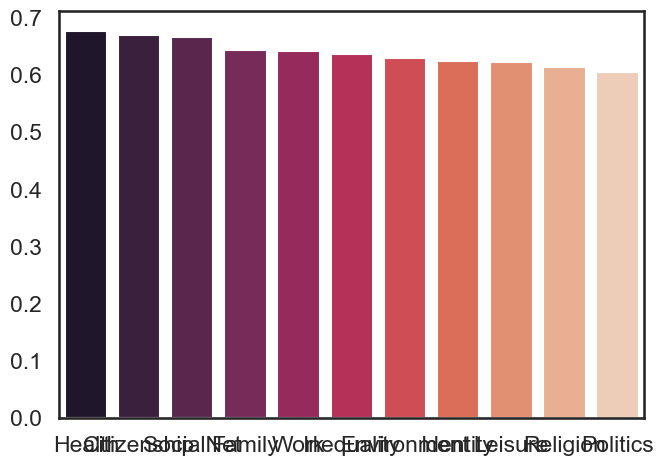

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# # Set up the matplotlib figure
# f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)


# Generate some sequential data
x = rank_topic_name
y1 = rank_dis_topic
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Sequential")

# # Center the data to make it diverging
# y2 = y1 - 5.5
# sns.barplot(x=x, y=y2, hue=x, palette="vlag", ax=ax2)
# ax2.axhline(0, color="k", clip_on=False)
# ax2.set_ylabel("Diverging")

# # Randomly reorder the data to make it qualitative
# y3 = rs.choice(y1, len(y1), replace=False)
# sns.barplot(x=x, y=y3, hue=x, palette="deep", ax=ax3)
# ax3.axhline(0, color="k", clip_on=False)
# ax3.set_ylabel("Qualitative")

# Finalize the plot
# sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [37]:
rank_dis_country = np.sort(distance_country.mean(1))[::-1]
rank_country_idx = np.argsort(distance_country.mean(1))[::-1]
rank_country_name = [vis_countries[idx] for idx in rank_country_idx]
print("rank_dis_topic", rank_dis_country)
print("rank_topic_name", rank_country_name)

rank_dis_topic [0.70946115 0.69135299 0.69099566 0.69083788 0.68358162 0.66126526
 0.65715547 0.65630316 0.64958099 0.6470272  0.63642439 0.63485947]
rank_topic_name ['India', 'Egypt', 'Uganda', 'Nigeria', 'Philippines', 'Canada', 'Pakistan', 'UK', 'Australia', 'France', 'US', 'Germany']


In [38]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="white", context="talk")
# rs = np.random.RandomState(8)


# # Set up the matplotlib figure
# f, ax1 = plt.subplots(1, 1, figsize=(7, 5), sharex=True)


# # Generate some sequential data
# x = rank_country_name
# y1 = rank_dis_country
# sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# plt.tight_layout(h_pad=2)

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/3150841160.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')


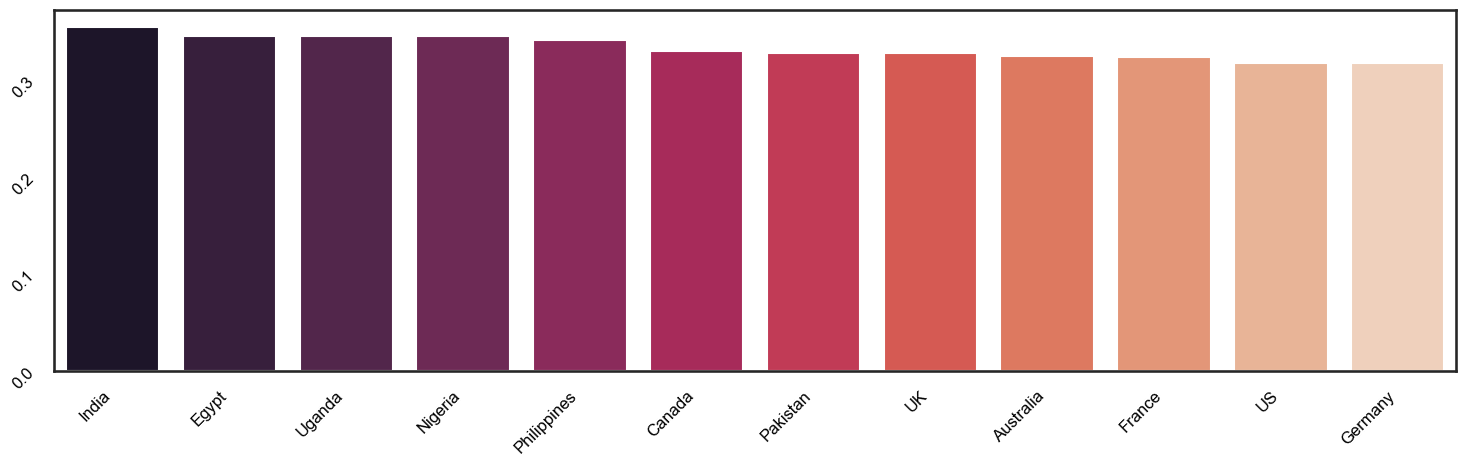

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)


# Set up the matplotlib figure
f, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)


# Generate some sequential data
x = rank_country_name
y1 = rank_dis_country
sns.barplot(x=x, y=y1, palette="rocket", ax=ax)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')

plt.tight_layout(h_pad=2)

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/792374302.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')


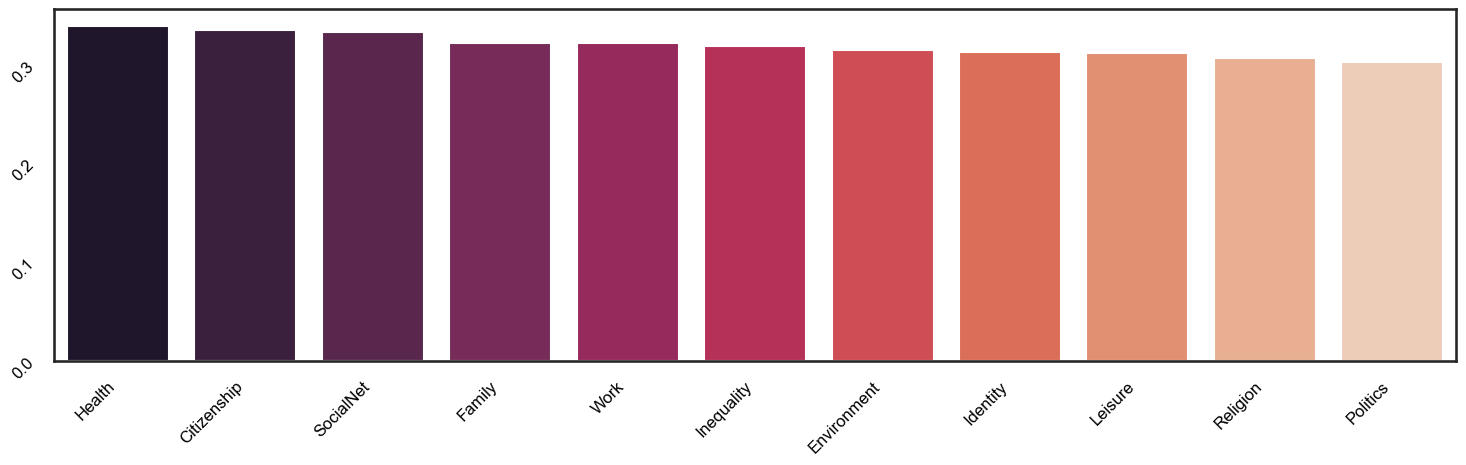

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)


# Set up the matplotlib figure
f, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)


# Generate some sequential data
x = rank_topic_name
y1 = rank_dis_topic
sns.barplot(x=x, y=y1, palette="rocket", ax=ax)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')

plt.tight_layout(h_pad=2)

In [41]:
countries

['United States',
 'India',
 'Pakistan',
 'Nigeria',
 'Philippines',
 'United Kingdom',
 'Germany',
 'Uganda',
 'Canada',
 'Egypt',
 'France',
 'Australia']

In [42]:
k = 5 # UK
rank_dis_country = np.sort(distance_country[k])[::-1]
rank_country_idx = np.argsort(distance_country[k])[::-1]
rank_country_name = [value_list[idx] for idx in rank_country_idx]
print("rank_dis_topic", rank_dis_country)
print("rank_topic_name", rank_country_name)

rank_dis_topic [1.         0.99376299 0.98336798 0.98336798 0.98336798 0.98336798
 0.97297297 0.96257796 0.96257796 0.95634096 0.95114345 0.93451143
 0.92411642 0.91995842 0.91891892 0.88253638 0.84511435 0.83320733
 0.83056133 0.8035343  0.7983368  0.7983368  0.74636175 0.73965224
 0.73596674 0.71064071 0.7047817  0.69230769 0.67321867 0.66839917
 0.65696466 0.65696466 0.63721414 0.63721414 0.63721414 0.62993763
 0.61973162 0.60914761 0.57645058 0.50992251 0.5031185  0.46569647
 0.45539596 0.43451143 0.42373842 0.42213192 0.41910792 0.38990739
 0.33849934 0.25014175 0.23861274 0.21120771 0.06822907 0.03600454
 0.02258552 0.01001701]
rank_topic_name ['Social Power', 'Protecting the Environment', 'Honest', 'Self-Respect', 'Broad-Minded', 'A World at Peace', 'Freedom', 'Healthy', 'True Friendship', 'Responsible', 'Helpful', 'Wisdom', 'Family Security', 'Politeness', 'Choosing Own Goals', 'Mature Love', 'Intelligent', 'Meaning in Life', 'Forgiving', 'Capable', 'Creativity', 'Curious', 'Un

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/707192630.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')


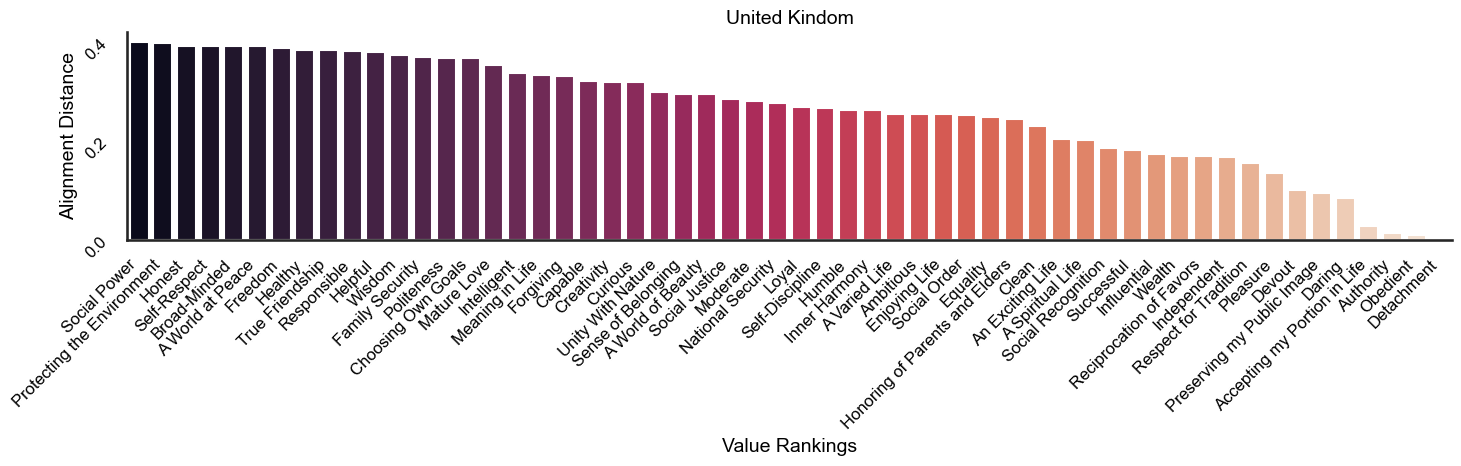

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)


# Set up the matplotlib figure
f, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)


# Generate some sequential data
x = rank_country_name
y1 = rank_dis_country
sns.barplot(x=x, y=y1, palette="rocket", ax=ax)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Value Rankings', fontsize=14, fontfamily='Arial', color='black')
ax.set_ylabel('Alignment Distance', fontsize=14, fontfamily='Arial', color='black')
ax.set_title('United Kindom', fontsize=14, fontfamily='Arial', color='black')


plt.tight_layout(h_pad=2)

plt.savefig("../../outputs/figures/ranking_uk.pdf", format='pdf', bbox_inches='tight', dpi=300)

In [44]:
k = 7 # Uganda
rank_dis_country = np.sort(distance_country[k])[::-1]
rank_country_idx = np.argsort(distance_country[k])[::-1]
rank_country_name = [value_list[idx] for idx in rank_country_idx]
print("rank_dis_topic", rank_dis_country)
print("rank_topic_name", rank_country_name)

rank_dis_topic [0.97661123 0.97661123 0.97661123 0.97661123 0.96621622 0.96621622
 0.96621622 0.96621622 0.96621622 0.95997921 0.95582121 0.93503119
 0.93503119 0.90904366 0.90696466 0.89864865 0.88773389 0.83164808
 0.81600832 0.80561331 0.80093555 0.7983368  0.78118503 0.76195426
 0.72146097 0.71938197 0.71933472 0.71153846 0.6985447  0.6980722
 0.69074844 0.65696466 0.65696466 0.65696466 0.65441315 0.65280665
 0.64193914 0.62577963 0.60654886 0.60239085 0.56922132 0.56605557
 0.56605557 0.56605557 0.50987526 0.49168399 0.4527027  0.4022869
 0.3967114  0.35446985 0.33282933 0.32545833 0.29687205 0.27343602
 0.0973351  0.05939331]
rank_topic_name ['A World at Peace', 'Self-Respect', 'Healthy', 'Honest', 'True Friendship', 'Forgiving', 'Loyal', 'Sense of Belonging', 'Family Security', 'Honoring of Parents and Elders', 'Responsible', 'Wisdom', 'Meaning in Life', 'Helpful', 'A Spiritual Life', 'Mature Love', 'Humble', 'Devout', 'Protecting the Environment', 'Broad-Minded', 'Inner Harmony

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/1656481583.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')


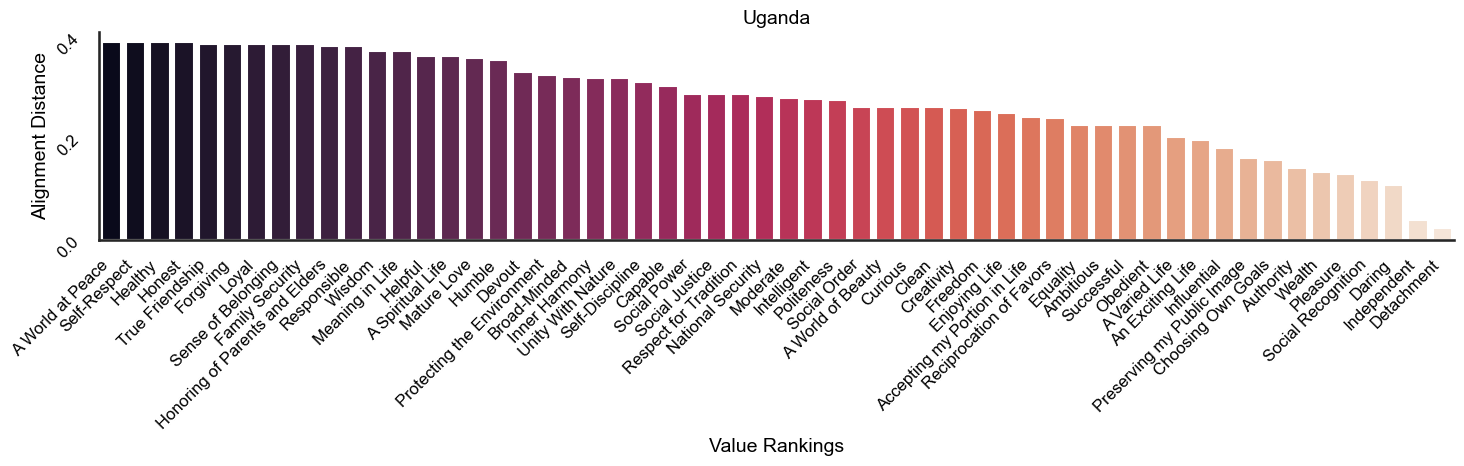

In [45]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="white", context="talk")
# rs = np.random.RandomState(8)


# # Set up the matplotlib figure
# f, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)


# # Generate some sequential data
# x = rank_country_name
# y1 = rank_dis_country
# sns.barplot(x=x, y=y1, palette="rocket", ax=ax)


# ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
# ax.spines[['right', 'top']].set_visible(False)
# plt.tight_layout(h_pad=2)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)


# Set up the matplotlib figure
f, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)


# Generate some sequential data
x = rank_country_name
y1 = rank_dis_country
sns.barplot(x=x, y=y1, palette="rocket", ax=ax)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black', rotation=45, ha='right')
ax.spines[['right', 'top']].set_visible(False)

ax.set_xlabel('Value Rankings', fontsize=14, fontfamily='Arial', color='black')
ax.set_ylabel('Alignment Distance', fontsize=14, fontfamily='Arial', color='black')
ax.set_title('Uganda', fontsize=14, fontfamily='Arial', color='black')


plt.tight_layout(h_pad=2)

plt.savefig("../../outputs/figures/ranking_uganda.pdf", format='pdf', bbox_inches='tight', dpi=300)

## Results Visualization

In [46]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.font_manager.get_font_names()

def heatmap_visualization(matrix, x_axis_labels, y_axis_labels, figsize, save_path=None):
    sns.set_theme(style="white")

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    # sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    hm = sns.heatmap(matrix,  cmap=cmap, square=True, cbar_kws={"shrink": .18, "pad": 0.01},  linewidths=.5, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontfamily='Arial', color='black')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontfamily='Arial', color='black')

    # Style the colorbar labels
    cbar = hm.collections[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), 
                           fontfamily='Arial',
                           color='black')

    # Save figure if path is provided
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight', dpi=300)
        

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


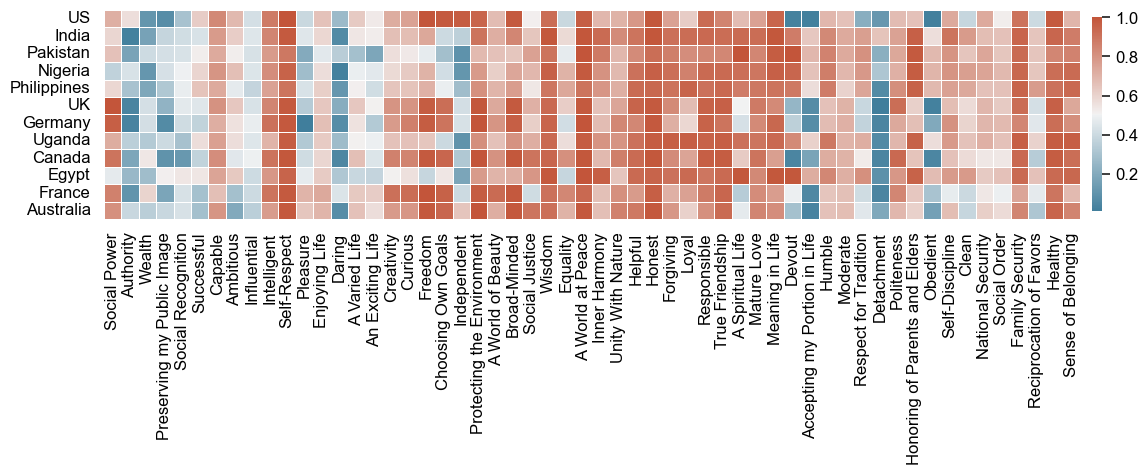

In [47]:
figsize = (15, 14)
heatmap_visualization(distance_country, value_list, vis_countries, figsize, "../../outputs/figures/distance_country.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


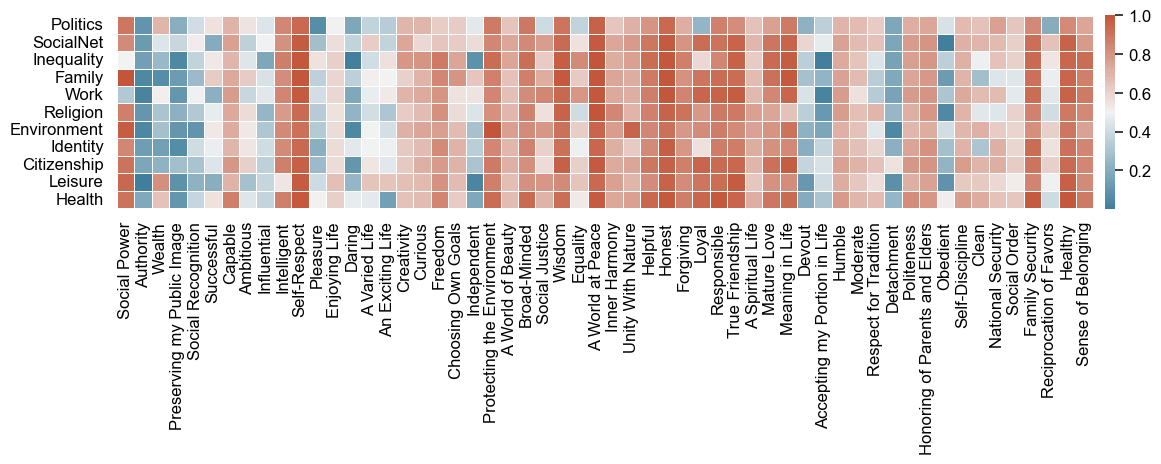

In [48]:
figsize = (15, 14)
heatmap_visualization(distance_topic, value_list, vis_topics, figsize, "../../outputs/figures/distance_topic.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_14322/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


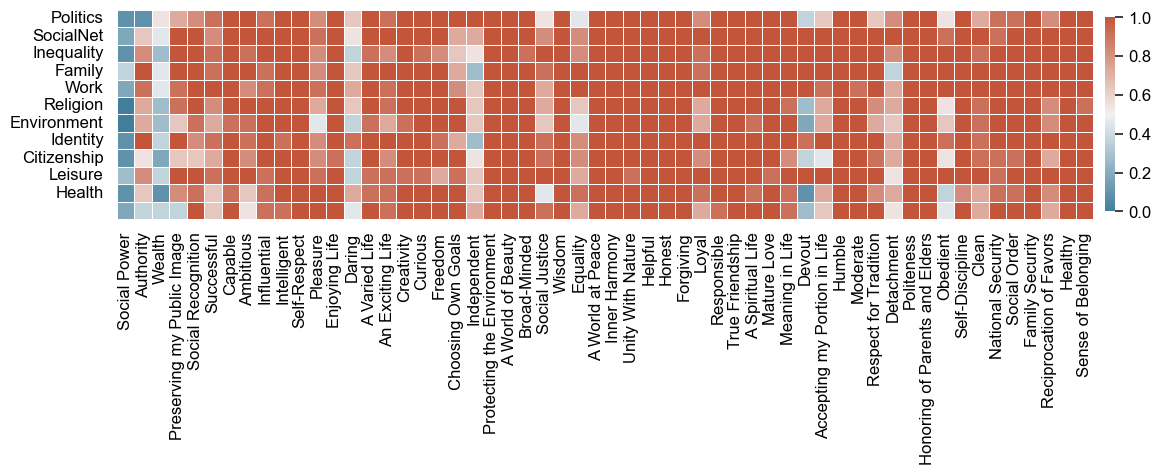

In [49]:
figsize = (15, 14)
heatmap_visualization(normalized_t2_grouped_country_values, value_list, vis_topics, figsize, "../../outputs/figures/distance_topic.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_10356/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


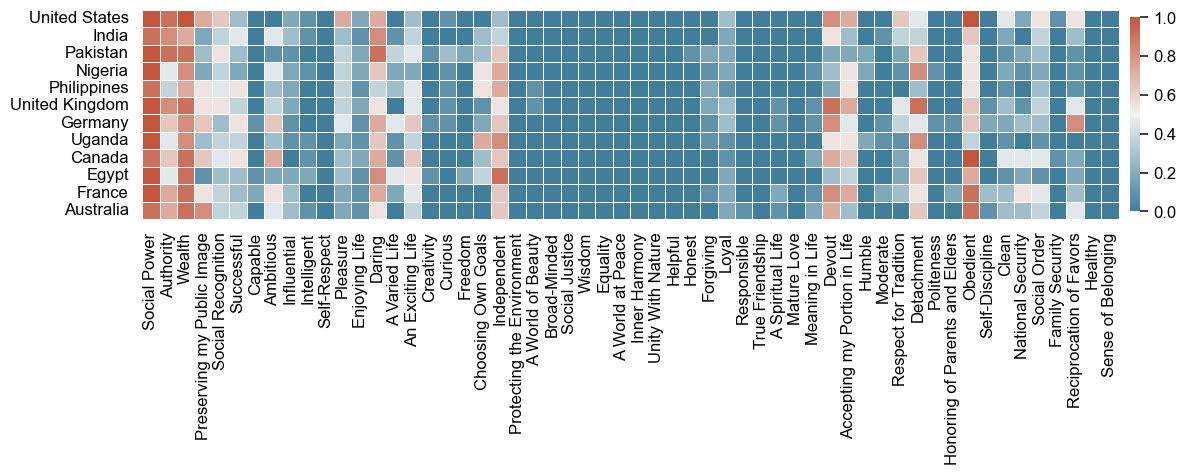

In [51]:
figsize = (15, 14)
heatmap_visualization(normalized_t2_grouped_country_values, value_list, countries, figsize, "../../outputs/figures/t2_country_gpt4o_mini.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_10356/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


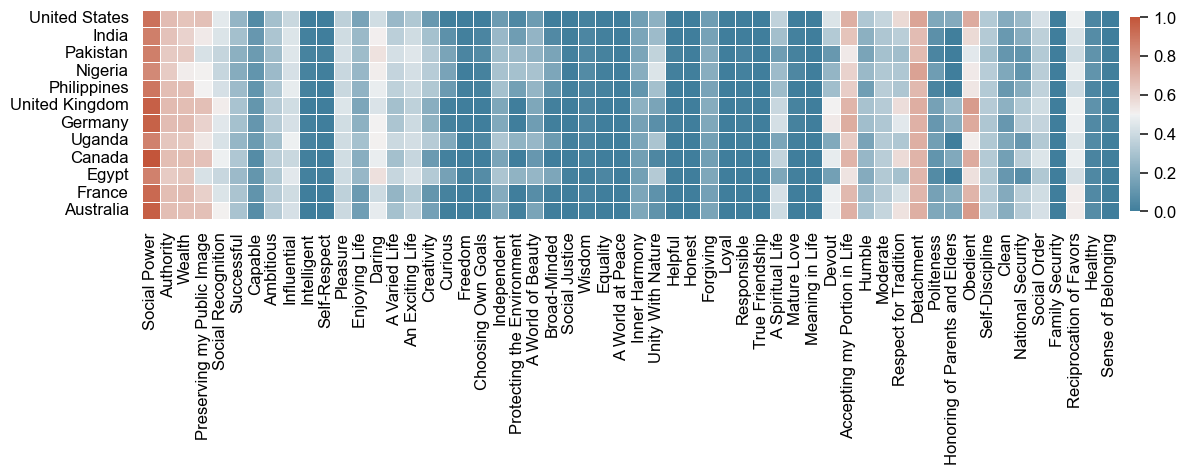

In [52]:
figsize = (15, 14)
heatmap_visualization(normalized_t1_grouped_country_values, value_list, countries, figsize, "../../outputs/figures/t1_country_gpt4o_mini.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_10356/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


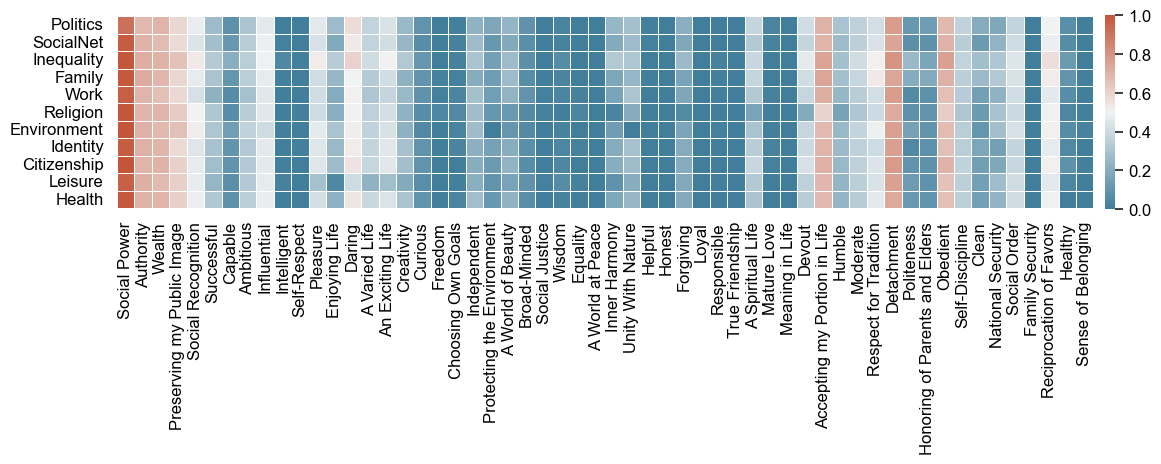

In [55]:
figsize = (15, 14)
heatmap_visualization(normalized_t1_grouped_topic_values, value_list, vis_topics, figsize, "../../outputs/figures/t1_topics_gpt4o_mini.pdf")

/var/folders/hz/rnzjy67s1_151z1g0l3bm2g40000gn/T/ipykernel_10356/1720060437.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),


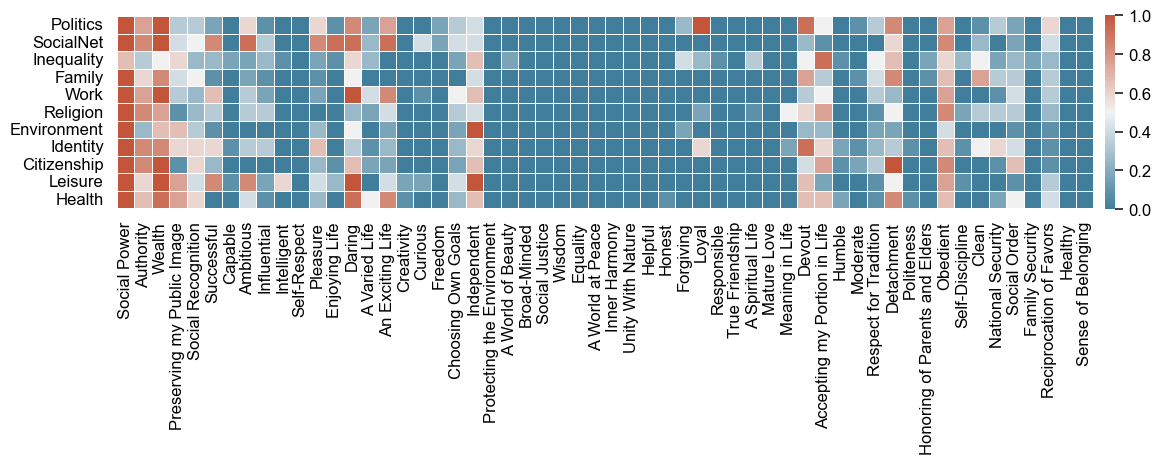

In [56]:
figsize = (15, 14)
heatmap_visualization(normalized_t2_grouped_topic_values, value_list, vis_topics, figsize, "../../outputs/figures/t2_topics_gpt4o_mini.pdf")